In [1]:
import json

import rclpy
from rclpy.node import Node

from nimbro_utils.imports_lazy import start_and_spin_node
from vlm_gist.imports_lazy import VlmGist, test_image_path

In [2]:
class VlmGistNode(Node):
    def __init__(self, context=None):
        super().__init__("vlm_gist_node", context=context)
        self.vlm_gist = VlmGist(self, parallel_completions=None, logger_severity=20)
        self.vlm_gist.detection.set_settings(settings={'crop_masks': False})

In [3]:
node, executor, context, thread = start_and_spin_node(VlmGistNode, blocking=False)

In [4]:
image = test_image_path
# image = "https://upload.wikimedia.org/wikipedia/commons/4/46/Table.JPG"
# image ="https://upload.wikimedia.org/wikipedia/commons/1/12/Universit%C3%A4t_Bonn.jpg"

success, message, descriptions, bboxes, confidences, masks, track_ids, metadata = node.vlm_gist.get(image=image, settings={'skip_validation': True})

2025-09-04 16:31:42.933 [INFO] [vlm_gist_node.vlm_gist]: Processing '1' image
2025-09-04 16:31:43.569 [INFO] [vlm_gist_node.structured_description]: Generating '1' structured description
2025-09-04 16:31:43.588 [INFO] [vlm_gist_node.structured_description]: Progress: {'UNPROCESSED': 1, 'TOTAL': 1} after 0.1s
2025-09-04 16:31:44.704 [INFO] [vlm_gist_node.structured_description]: Progress: {'GENERATING_STRUCTURED_DESCRIPTION': 1, 'TOTAL': 1} after 1.1s
2025-09-04 16:31:45.791 [INFO] [vlm_gist_node.structured_description]: Progress: {'GENERATING_STRUCTURED_DESCRIPTION': 1, 'TOTAL': 1} after 2.1s
2025-09-04 16:31:46.874 [INFO] [vlm_gist_node.structured_description]: Progress: {'GENERATING_STRUCTURED_DESCRIPTION': 1, 'TOTAL': 1} after 3.2s
2025-09-04 16:31:47.888 [INFO] [vlm_gist_node.structured_description]: Progress: {'GENERATING_STRUCTURED_DESCRIPTION': 1, 'TOTAL': 1} after 4.2s
2025-09-04 16:31:48.100 [INFO] [vlm_gist_node.structured_description]: Progress: {'GENERATING_STRUCTURED_DESCR

/home/paetzoldb0/ws/jazzy/main/src/vlm_gist/datasets/vlm_gist/data/00009.jpg:


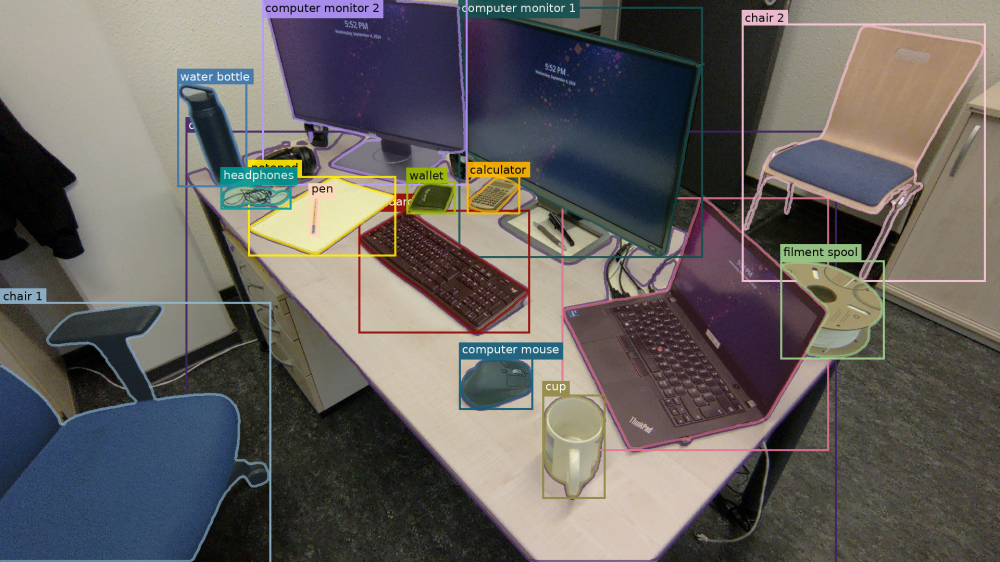

computer mouse: a black ergonomic computer mouse
calculator: a grey office calculator
desk: a light brown wooden office desk
wallet: a black mens wallet
keyboard: a black Logitech wireless keyboard
chair 1: a blue office chair with wheels
computer monitor 1: a black Dell computer monitor
pen: a small orange and white pen
laptop: a black ThinkPad laptop with an open lid
cup: a white ceramic mug with no liquid inside
computer monitor 2: a black HP computer monitor
filment spool: a white filament spool on the floor
notepad: a white spiral bound notepad with a pen on it
water bottle: a black water bottle with a loop on top
chair 2: a light wooden chair with a blue upholstered seat
headphones: a pair of black wireless headphones with a coiled wire


In [5]:
from nimbro_utils.imports_lazy import visualize_detections, show_image
visualization = visualize_detections(image=image, boxes=bboxes, masks=masks, labels=[description['object_name'] for description in descriptions], box_format="xyxy_absolute")
print(f"{image}:")
show_image(visualization, width=1000)
for description in descriptions:
    print(f"{description['object_name']}: {description['description']}")

In [6]:
node.api_director.release()

(True, "Released completions node ['/nimbro_api/completions_1'] (1).")

In [7]:
executor.shutdown()
node.destroy_node()
context.shutdown()
del executor, node, context, thread